Nama : Muhammad Mahdi <br/>
NIM  : 21/473808/PA/20431

# Image Enchancement (Pixel Based)

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
from PIL import Image
import matplotlib.pylab as plt
import numpy as np
import scipy.stats as st
import numpy as np
import math

1. Histogram Equalization

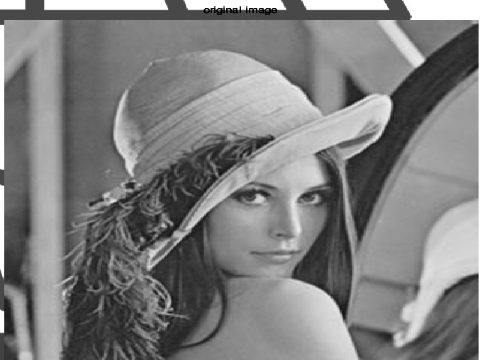

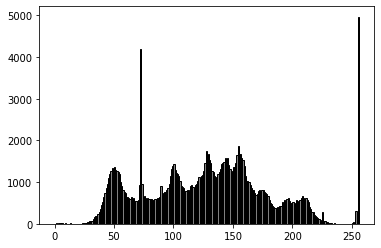

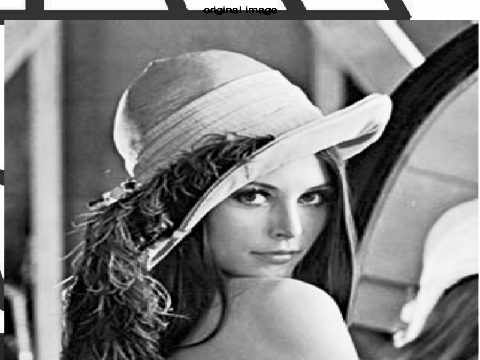

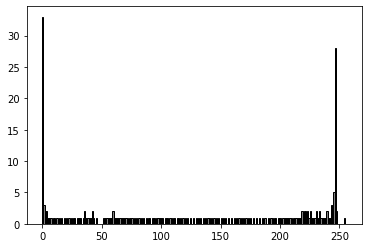

In [ ]:
h, w=360, 480
img1=cv.imread('/content/drive/MyDrive/Colab Notebooks/sharpening.png')
img1=cv.cvtColor(img1,cv.COLOR_BGR2GRAY)
img1=cv.resize(img1,(w,h))

img2 = img1.copy();

#flatten image array and calculate histogram via binning
histogram_array = np.bincount(img2.flatten(), minlength=256)

#normalize
num_pixels = np.sum(histogram_array)
histogram_array = histogram_array/num_pixels

#normalized cumulative histogram
chistogram_array = np.cumsum(histogram_array)

transform_map = np.floor(255 * chistogram_array).astype(np.uint8)

# flatten image array into 1D list
img_list = list(img1.flatten())

# transform pixel values to equalize
eq_img_list = [transform_map[p] for p in img_list]

# reshape and write back into img_array
eq_img_array = np.reshape(np.asarray(eq_img_list), img1.shape)


cv2_imshow(img1)
plt.hist(img1.flatten(), 256, [0,256], color="gray", ec="black")
plt.show()

cv2_imshow(eq_img_array)
plt.hist(transform_map, 256, [0,256], color="gray", ec="black")
plt.show()

2. Gray-Level Slicing

A) Darkening other pixel value

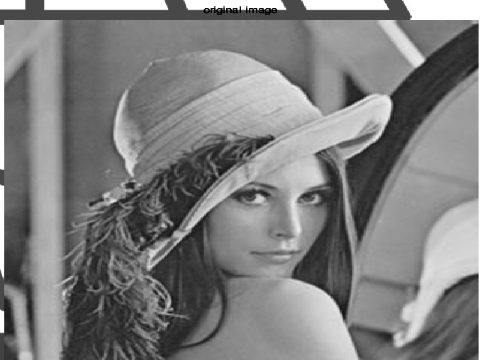

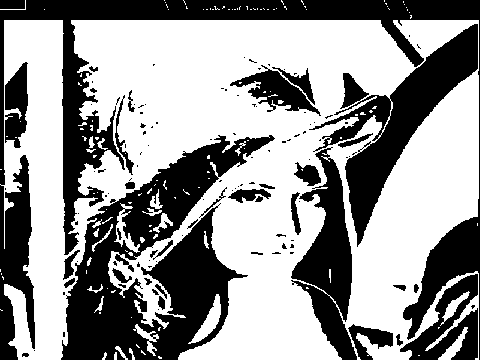

In [ ]:
h, w=360, 480
img1=cv.imread('/content/drive/MyDrive/Colab Notebooks/sharpening.png')
img1=cv.cvtColor(img1,cv.COLOR_BGR2GRAY)
img1=cv.resize(img1,(w,h))

img2 = img1.copy();

min_range = 100
max_range = 200

for i in range(img1.shape[0]):
  for j in range(img1.shape[1]):
    if(img1[i][j]>=min_range and img1[i][j]<=max_range):
      img2[i][j] = 255
    else:
      img2[i][j] = 0

cv2_imshow(img1)
cv2_imshow(img2)

B) Preserving other pixel value

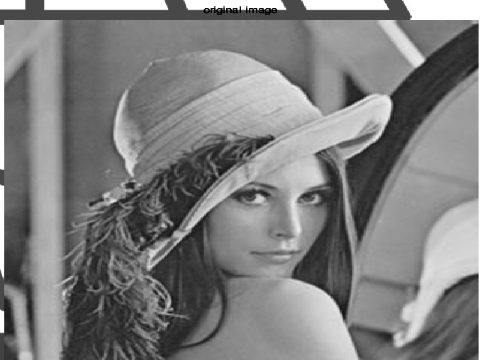

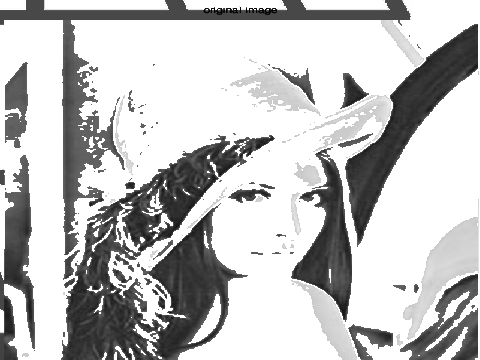

In [ ]:
h, w=360, 480
img1=cv.imread('/content/drive/MyDrive/Colab Notebooks/sharpening.png')
img1=cv.cvtColor(img1,cv.COLOR_BGR2GRAY)
img1=cv.resize(img1,(w,h))

img2 = img1.copy();

min_range = 100
max_range = 200

for i in range(img1.shape[0]):
  for j in range(img1.shape[1]):
    if(img1[i][j]>=min_range and img1[i][j]<=max_range):
      img2[i][j] = 255


cv2_imshow(img1)
cv2_imshow(img2)

3. Logarithmic Transform

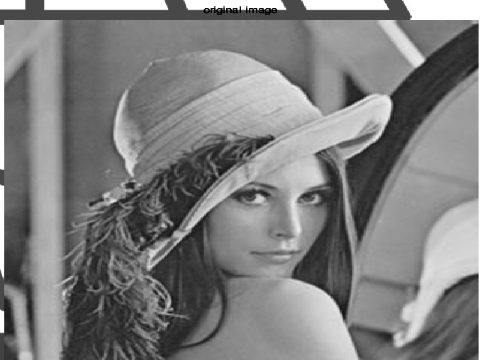

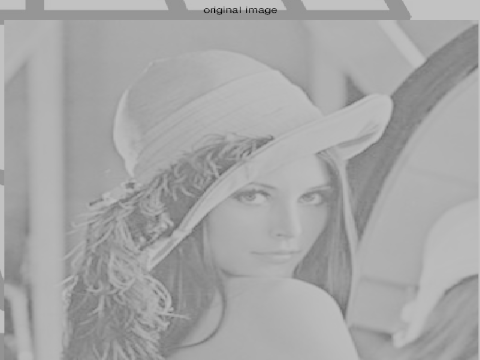

In [ ]:
c = 35
h, w=360, 480
img1=cv.imread('/content/drive/MyDrive/Colab Notebooks/sharpening.png')
img1=cv.cvtColor(img1,cv.COLOR_BGR2GRAY)
img1=cv.resize(img1,(w,h))

img2 = img1.copy()

for i in range(img1.shape[0]):
  for j in range(img1.shape[1]):
    img2[i][j]=c*math.log(1 + img1[i][j])


cv2_imshow(img1)
cv2_imshow(img2)

4. Image Negative


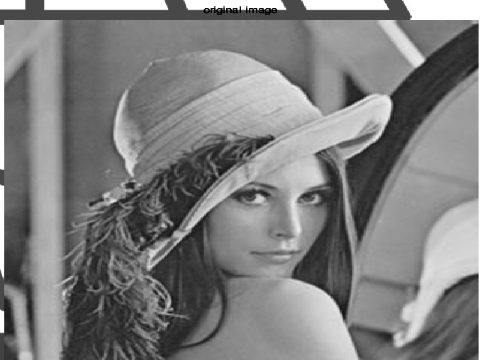

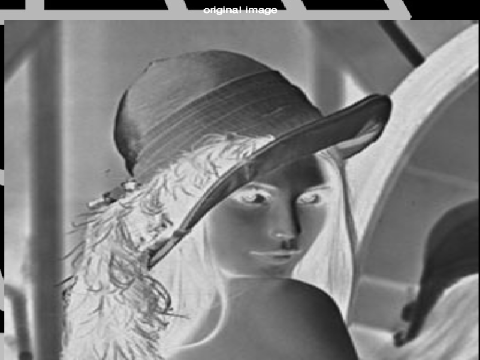

In [ ]:
h, w=360, 480
img1=cv.imread('/content/drive/MyDrive/Colab Notebooks/sharpening.png')
img1=cv.cvtColor(img1,cv.COLOR_BGR2GRAY)
img1=cv.resize(img1,(w,h))

img2 = 255 - img1

cv2_imshow(img1)
cv2_imshow(img2)

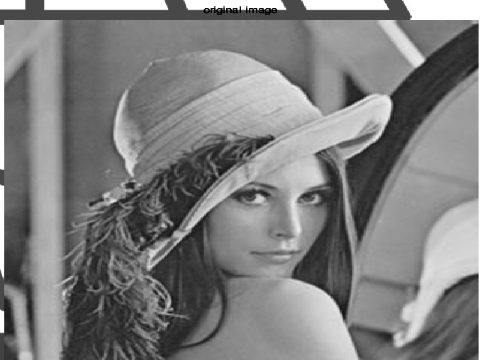

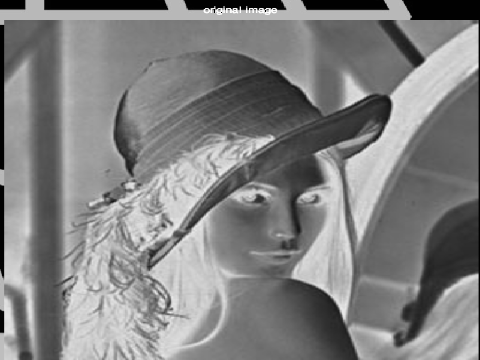

In [ ]:
h, w=360, 480
img1=cv.imread('/content/drive/MyDrive/Colab Notebooks/sharpening.png')
img1=cv.cvtColor(img1,cv.COLOR_BGR2GRAY)
img1=cv.resize(img1,(w,h))

img2 = img1.copy()

for i in range(img1.shape[0]):
  for j in range(img1.shape[1]):
    img2[i][j] = 256-img2[i][j]

cv2_imshow(img1)
cv2_imshow(img2)

5. Constant Strecthing

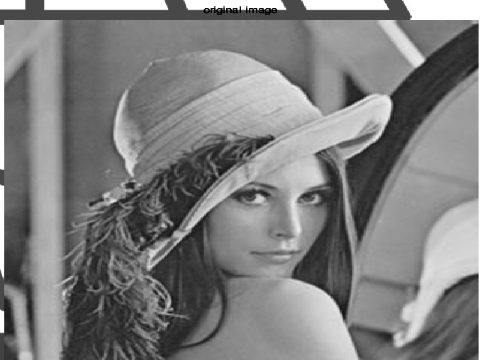

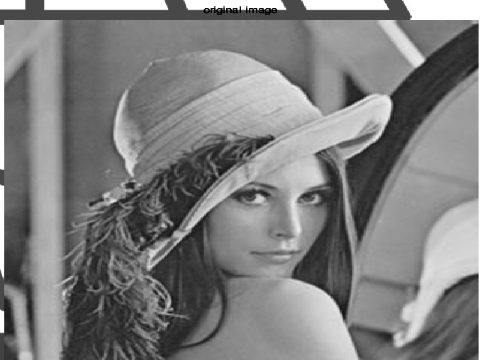

In [ ]:
h, w=360, 480
img1=cv.imread('/content/drive/MyDrive/Colab Notebooks/sharpening.png')
img1=cv.cvtColor(img1,cv.COLOR_BGR2GRAY)
img1=cv.resize(img1,(w,h))

img2 = np.zeros((img1.shape[0],img1.shape[1]),dtype = 'uint8')

for i in range(img1.shape[0]):
    for j in range(img1.shape[1]):
        img2[i,j] = 255*(img1[i,j]-np.min(img1))/(np.max(img1)-np.min(img1))


cv2_imshow(img1)
cv2_imshow(img2)

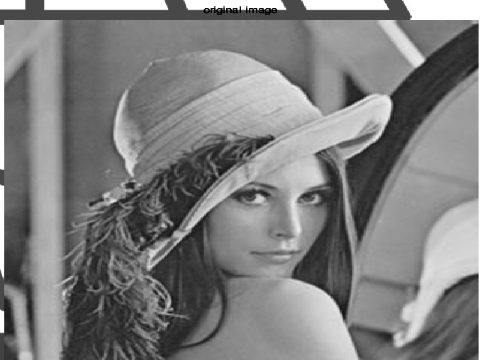

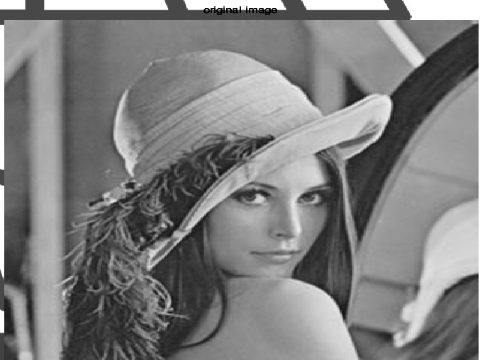

In [ ]:
h, w=360, 480
img1=cv.imread('/content/drive/MyDrive/Colab Notebooks/sharpening.png')
img1=cv.cvtColor(img1,cv.COLOR_BGR2GRAY)
img1=cv.resize(img1,(w,h))

min=img1.min()
max=img1.max()

a, b = 0, 255
output = np.zeros((h, w), dtype=np.uint8)
for i in range(img1.shape[0]):
  for j in range(img1.shape[1]):
    img2[i][j]=(img1[i][j]-min)*((b-a)/(max-min))+a

cv2_imshow(img1)
cv2_imshow(img2)

6. Bit-Slicing

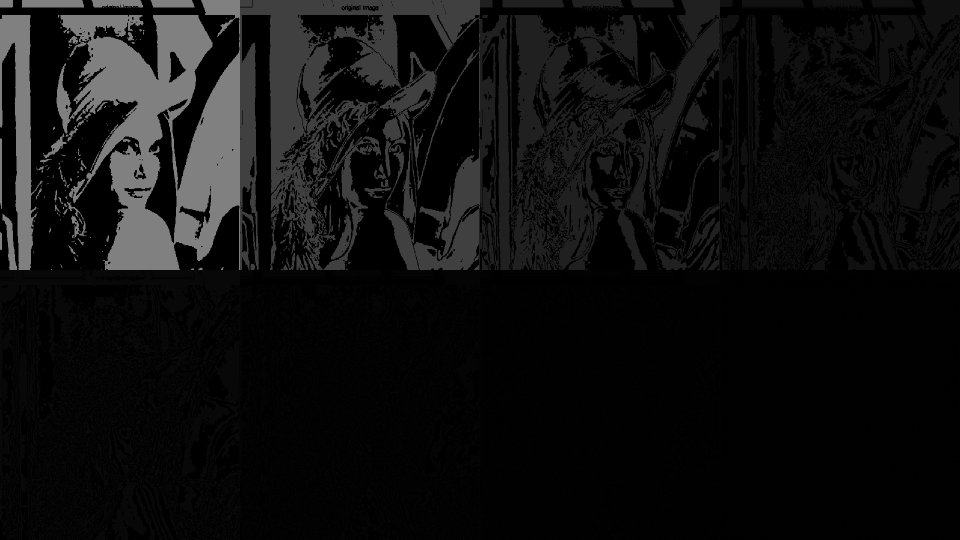

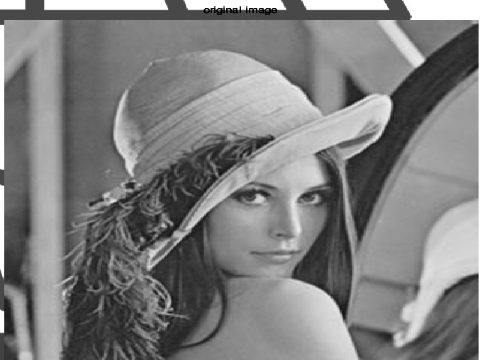

In [ ]:
h, w=360, 480
img1=cv.imread('/content/drive/MyDrive/Colab Notebooks/sharpening.png')
img1=cv.cvtColor(img1,cv.COLOR_BGR2GRAY)
img1=cv.resize(img1,(w,h))

img2 = img1.copy()

# Lakukan iterasi setiap piksel dan ubah nilai piksel kedalam binary menggunakan fungsi np.ninary_repr()
binary_img = []
for i in range(img2.shape[0]):
    for j in range(img2.shape[1]):
        binary_img.append(np.binary_repr(img2[i][j], width=8))  # width = no. of bits

# Lakukan iterasi dari setiap string yang merepresentasikan nilai biner piksel
bit_eight_img = (np.array([int(i[0]) for i in binary_img], dtype=np.uint8) * 128).reshape(img2.shape[0], img2.shape[1])
bit_seven_img = (np.array([int(i[1]) for i in binary_img], dtype=np.uint8) * 64).reshape(img2.shape[0], img2.shape[1])
bit_six_img = (np.array([int(i[2]) for i in binary_img], dtype=np.uint8) * 32).reshape(img2.shape[0], img2.shape[1])
bit_five_img = (np.array([int(i[3]) for i in binary_img], dtype=np.uint8) * 16).reshape(img2.shape[0], img2.shape[1])
bit_four_img = (np.array([int(i[4]) for i in binary_img], dtype=np.uint8) * 8).reshape(img2.shape[0], img2.shape[1])
bit_three_img = (np.array([int(i[5]) for i in binary_img], dtype=np.uint8) * 4).reshape(img2.shape[0], img2.shape[1])
bit_two_img = (np.array([int(i[6]) for i in binary_img], dtype=np.uint8) * 2).reshape(img2.shape[0], img2.shape[1])
bit_one_img = (np.array([int(i[7]) for i in binary_img], dtype=np.uint8) * 1).reshape(img2.shape[0], img2.shape[1])

# Concatenate citra bit plane sehingga mudah untuk ditampilkan menggunakan cv2.hconcat()
sliced_img_r = cv.hconcat([bit_eight_img, bit_seven_img, bit_six_img, bit_five_img])
sliced_img_v = cv.hconcat([bit_four_img, bit_three_img, bit_two_img, bit_one_img])

# Vertically concatenate
sliced_img = cv.vconcat([sliced_img_r, sliced_img_v])
resized_sliced_img = cv.resize(sliced_img, (960, 540))

# Menampilkan Citra Bit Plane
cv2_imshow(resized_sliced_img)
cv2_imshow(img1)

# Image Enhancement (Based on Filtering)

In [ ]:
def konvolusi(input_img, kernel):
  #inisialisasi output dengan matrix dengan nilai 0
  output = np.zeros(input_img.shape)
  #padding angka 0 pada border input gambar
  padding = np.pad(input_img, pad_width=1, mode='constant', constant_values=0)
  for i in range(input_img.shape[0]):
    for j in range(input_img.shape[1]):
      for k in range(kernel.shape[0]):
        for l in range(kernel.shape[1]):
          output[i][j] = output[i][j] + kernel[k][l]*padding[i+k][j+l]
  return output

1. Sharpening

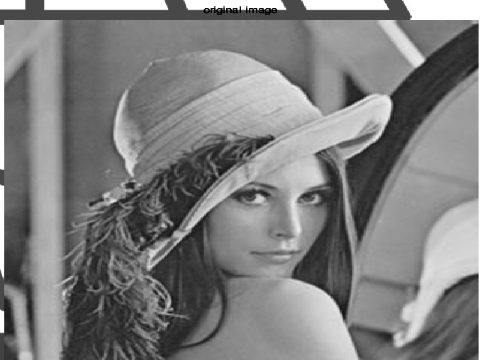

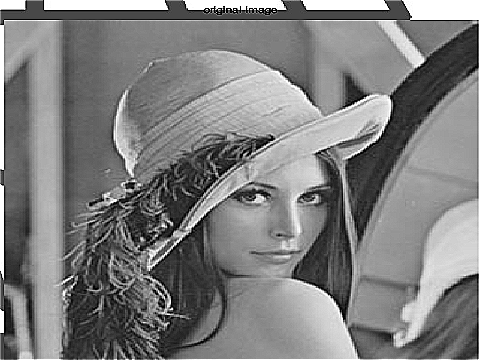

In [ ]:
h, w=360, 480
image=cv.imread('/content/drive/MyDrive/Colab Notebooks/sharpening.png')
image=cv.cvtColor(image,cv.COLOR_BGR2GRAY)
image=cv.resize(image,(w,h))

output = np.zeros(image.shape);
kernel = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])
output = konvolusi(image, kernel)


cv2_imshow(image)
cv2_imshow(output)

2. Blur

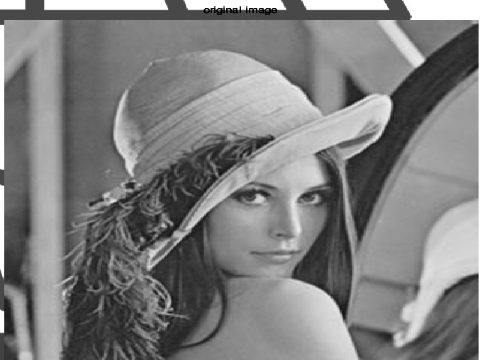

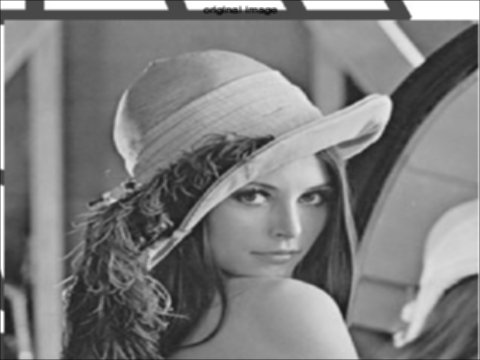

In [ ]:
h, w=360, 480
image=cv.imread('/content/drive/MyDrive/Colab Notebooks/sharpening.png')
image=cv.cvtColor(image,cv.COLOR_BGR2GRAY)
image=cv.resize(image,(w,h))


output = np.zeros(image.shape);
kernel = (1/9)*np.array([[1, 1, 1],
                   [1, 1, 1],
                   [1, 1, 1]])
output = konvolusi(image, kernel)

cv2_imshow(image)
cv2_imshow(output)

3. Gaussian Kernel

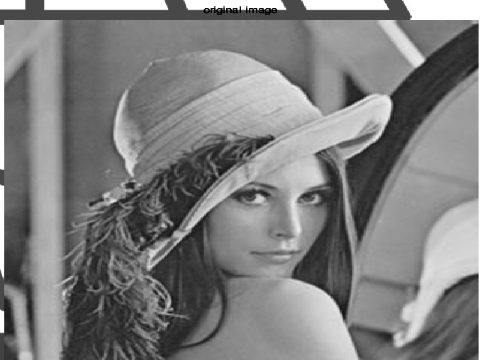

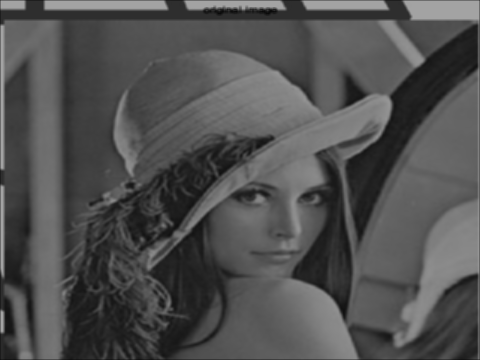

In [ ]:
h, w=360, 480
image=cv.imread('/content/drive/MyDrive/Colab Notebooks/sharpening.png')
image=cv.cvtColor(image,cv.COLOR_BGR2GRAY)
image=cv.resize(image,(w,h))

output = np.zeros(image.shape);
kernel = np.array([[1, 1, 1],
                    [1, 1, 1],
                    [1, 1, 1]])/14

output = konvolusi(image, kernel)

cv2_imshow(image)
cv2_imshow(output)

4. Median Filter

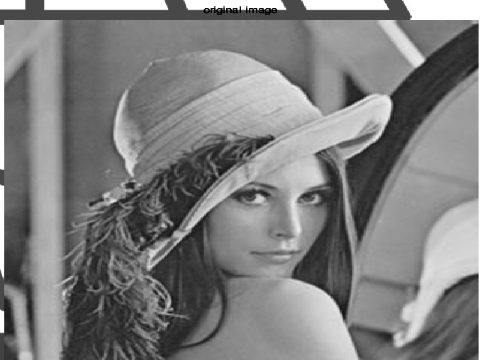

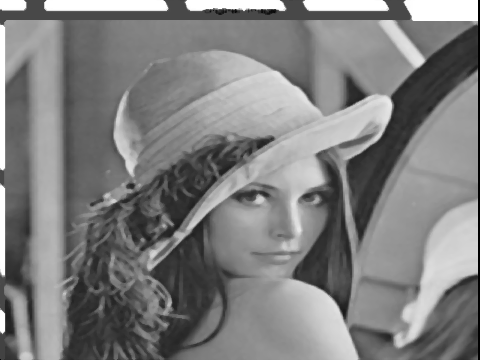

In [ ]:
h, w=360, 480
image=cv.imread('/content/drive/MyDrive/Colab Notebooks/sharpening.png')
image=cv.cvtColor(image,cv.COLOR_BGR2GRAY)
image=cv.resize(image,(w,h))

output = np.zeros(image.shape);

def median_filter(data, kernel_size):
  temp = []
  indexer = kernel_size // 2
  data_final = []
  data_final = np.zeros((len(data),len(data[0])))
  for i in range(len(data)):
        for j in range(len(data[0])):
            for z in range(kernel_size):
                if i + z - indexer < 0 or i + z - indexer > len(data) - 1:
                    for c in range(kernel_size):
                        temp.append(0)
                else:
                    if j + z - indexer < 0 or j + indexer > len(data[0]) - 1:
                        temp.append(0)
                    else:
                        for k in range(kernel_size):
                            temp.append(data[i + z - indexer][j + k - indexer])

            temp.sort()
            data_final[i][j] = temp[len(temp) // 2]
            temp = []
  return data_final

output = median_filter(image, 4)

cv2_imshow(image)
cv2_imshow(output)

5. Laplacian Filters

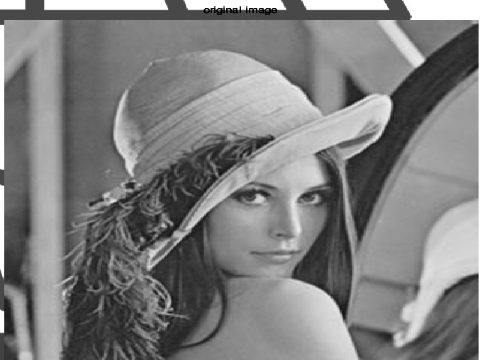

Laplacian:  954.0 -1383.0
Laplacian:  100.0 -144.9685534591195


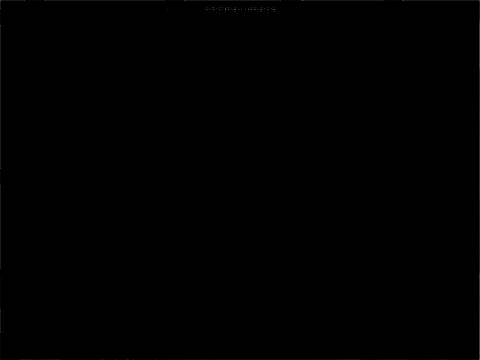

New image:  355.0 -131.9685534591195
New image (abs):  355.0 0.02096436058700135
New image (scale):  255.00000000000003 0.015058906900522098


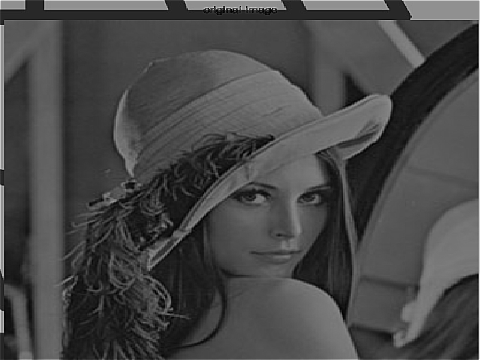

In [ ]:
h, w=360, 480
image=cv.imread('/content/drive/MyDrive/Colab Notebooks/sharpening.png')
image=cv.cvtColor(image,cv.COLOR_BGR2GRAY)
image=cv.resize(image,(w,h))

cv2_imshow(image)

output = np.zeros(image.shape);

kernel = np.array([[-1,-1,-1],
                   [-1,-1,-1],
                   [-1,-1,-1]])
kernel[1,1] = 6

laplacian = konvolusi(image, kernel)

print('Laplacian: ', np.amax(laplacian), np.amin(laplacian))

sharpening_factor = 100
laplacian = laplacian*sharpening_factor/np.amax(laplacian)
print('Laplacian: ', np.amax(laplacian), np.amin(laplacian))

cv2_imshow(laplacian)

output = image + laplacian
print('New image: ', np.amax(output), np.amin(output))

output = abs(output)
print('New image (abs): ', np.amax(output), np.amin(output))

output *= 255/np.amax(output)
print('New image (scale): ', np.amax(output), np.amin(output))

cv2_imshow(output)

- Watershed

In [ ]:
import cv2 as cv
import numpy as np
from skimage.feature import peak_local_max
from skimage.morphology import watershed
from scipy import ndimage

# Load in image, convert to gray scale, and Otsu's threshold
h, w=360, 480
image=cv.imread('/content/drive/MyDrive/Colab Notebooks/sharpening.png')
image=cv.resize(image,(w,h))
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
thresh = cv.threshold(gray, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)[1]

# Compute Euclidean distance from every binary pixel
# to the nearest zero pixel then find peaks
distance_map = ndimage.distance_transform_edt(thresh)
local_max = peak_local_max(distance_map, indices=False, min_distance=20, labels=thresh)

# Perform connected component analysis then apply Watershed
markers = ndimage.label(local_max, structure=np.ones((3, 3)))[0]
labels = watershed(-distance_map, markers, mask=thresh)

# Iterate through unique labels
total_area = 0
for label in np.unique(labels):
    if label == 0:
        continue

    # Create a mask
    mask = np.zeros(gray.shape, dtype="uint8")
    mask[labels == label] = 255

    # Find contours and determine contour area
    cnts = cv.findContours(mask.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    c = max(cnts, key=cv.contourArea)
    area = cv.contourArea(c)
    total_area += area
    cv.drawContours(image, [c], -1, (36,255,12), 4)

print(total_area)
cv2_imshow(gray)
cv2_imshow(image)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
/usr/local/lib/python3.7/dist-packages/skimage/morphology/_deprecated.py:5: skimage_deprecation: Function ``watershed`` is deprecated and will be removed in version 0.19. Use ``skimage.segmentation.watershed`` instead.
  def watershed(image, markers=None, connectivity=1, offset=None, mask=None,


TypeError: ignored

- Region Growing

- Clustering